PART B: [TOTAL 40 MARKS]
DATASET 1 DESCRIPTION
Use the datasets to answer the following questions;
1. Generate a machine learning model suitable for predicting the age of Abalone.
[10 MARKS]
2. To predict the age of the Abalone species in the testing dataset (i.e. Test.csv).
[5 MARKS]

In [2]:
#Question 1
#suppress warnings
import warnings
warnings.filterwarnings("ignore")  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import training and testing data
train_age = pd.read_csv("C:/Users/Admin/OneDrive - MOGAS Kenya LIMITED/personal/UCU/Year 2/Sem 1/Data Mining, Modelling and Analytics/DSS8307 Exam Instructions amp Datasets-20250226/Bukirwa Loritah_Exam_J24M19_003/Part B/Part B_Dataset/Train.csv")
test_age = pd.read_csv("C:/Users/Admin/OneDrive - MOGAS Kenya LIMITED/personal/UCU/Year 2/Sem 1/Data Mining, Modelling and Analytics/DSS8307 Exam Instructions amp Datasets-20250226/Bukirwa Loritah_Exam_J24M19_003/Part B/Part B_Dataset/Test.csv")

#display the first 5 rows of the training and testing data
train_age.head(5)


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
test_age.head(5)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [4]:
#checking for missing data.
train_age.isnull().sum()


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [5]:

train_age.info()
train_age.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


(90615, 10)

In [6]:
test_age.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [7]:
test_age.info()
test_age.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


(60411, 9)

In [8]:
#prepare the features and target variablei
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#label encoding the categorical variables
le = LabelEncoder()
train_age['Sex'] = le.fit_transform(train_age['Sex'])
test_age['Sex'] = le.fit_transform(test_age['Sex']) #use the same label encoder for the test data

#split the data into features and target variable
X = train_age.drop(columns=['Rings']) #all columns except 'Rings'
y = train_age['Rings'] #target variable

#split the data into training and testing data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#train the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\n Model Training Complete")


 Model Training Complete


In [10]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#predict the target variable
y_pred = model.predict(X_val)

#calculating the evaluation metrics
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred) #mean absolute error
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) #root mean squared error

#display the model performance
print(f"\nModel Performance on Validation Set:\n R² Score: {r2:.4f}\n MAE: {mae:.2f}\n RMSE: {rmse:.2f}")



Model Performance on Validation Set:
 R² Score: 0.6474
 MAE: 1.29
 RMSE: 1.90


The model achieves moderate predictive accuracy in estimating abalone age (via the Rings target), as evidenced by an R² score of 0.6474, indicating that 64.74% of the variability in ring counts is explained by the model. Predictions exhibit an average error of 1.29 rings (MAE) and a penalized error of 1.90 rings (RMSE), reflecting reasonable but imperfect precision. 

In [11]:
print(train_age.columns)  # Print all columns in train dataset


Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')


In [12]:
#Question 2.
#predict the target variable for the test data
#checking to see if the data is the same as the training data
X_val = test_age.drop(columns=['Rings'], errors='ignore') #all columns except 'Rings'

#predict rings
test_age["Predicted_Rings"] = model.predict(X_val)

#save predictions
test_age[["Predicted_Rings"]].to_csv("Abalone_Age_Predictions.csv", index=False)

print("\n Predictions saved as Abalone_Predictions.csv")



 Predictions saved as Abalone_Predictions.csv


In [13]:
predictions = pd.read_csv("Abalone_Age_Predictions.csv")
predictions.head(5)

,Predicted_Rings
0,10.18
1,10.23
2,11.82
3,12.05
4,9.36


DATASET 2 DESCRIPTION

The PatientReviews.csv dataset contains the patients’ medical visits with timelogs at a public healthcare centre.

Use the dataset to answer the following questions;

3. Generate the event logs for the above dataset and save them as Question 2. [10 MARKS]

4. Generate a visual showing “actions” undertaken at the hospital between January 2017 and June 2017. [10 MARKS]

5. Using appropriate process mining algorithms, show the flow of “actions” undertaken at
the hospital.

In [14]:
#Question 3
#load the data
pat = pd.read_csv("C:/Users/Admin/OneDrive - MOGAS Kenya LIMITED/personal/UCU/Year 2/Sem 1/Data Mining, Modelling and Analytics/DSS8307 Exam Instructions amp Datasets-20250226/Bukirwa Loritah_Exam_J24M19_003/Part B/Part B_Dataset/PatientReviews.csv")
pat.head(5) #display the first 5 rows of the data

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [15]:
pat.isnull().sum() #checking for missing data

patient          0
 action          0
 org:resource    0
 DateTime        0
dtype: int64

In [16]:
pat.info() #checking the data types of the columns
pat.shape #checking the shape of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient        690 non-null    object
 1    action        690 non-null    object
 2    org:resource  690 non-null    object
 3    DateTime      690 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


(690, 4)

In [17]:
#installing the pm4py library for process mining
!pip install pm4py 

In [18]:
pat.columns

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')

In [19]:
import pm4py

# Load dataset
file_path = "C:/Users/Admin/OneDrive - MOGAS Kenya LIMITED/personal/UCU/Year 2/Sem 1/Data Mining, Modelling and Analytics/DSS8307 Exam Instructions amp Datasets-20250226/Bukirwa Loritah_Exam_J24M19_003/Part B/Part B_Dataset/PatientReviews.csv"
log2_csv = pd.read_csv(file_path)

# Print original column names (for debugging)
print("Column names BEFORE cleaning:", log2_csv.columns)

# Remove spaces from column names
log2_csv.columns = log2_csv.columns.str.strip()

# Print cleaned column names (for debugging)
print("Column names AFTER cleaning:", log2_csv.columns)

#Convert "DateTime" to datetime format
log2_csv["DateTime"] = pd.to_datetime(log2_csv["DateTime"], errors="coerce")

# Rename columns correctly
log2_csv.rename(columns={
    "patient": "case:concept:name", 
    "action": "concept:name", 
    "org:resource": "org:resource", 
    "DateTime": "time:timestamp"
}, inplace=True)

# Ensure "time:timestamp" is in datetime format
assert pd.api.types.is_datetime64_any_dtype(log2_csv["time:timestamp"]), "❌ 'time:timestamp' is not in datetime format!"

# Reorder columns for process mining
log2_csv = log2_csv[["case:concept:name", "concept:name", "org:resource", "time:timestamp"]]

#Save as XES file (standard event log format)
xes_file_path = "Question2.xes"
pm4py.write_xes(log2_csv, xes_file_path)

print(f"\n Event Log saved to {xes_file_path}")


Column names BEFORE cleaning: Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')
Column names AFTER cleaning: Index(['patient', 'action', 'org:resource', 'DateTime'], dtype='object')


exporting log, completed traces :: 100%|██████████| 100/100 [00:00<00:00, 3145.59it/s]


 Event Log saved to Question2.xes


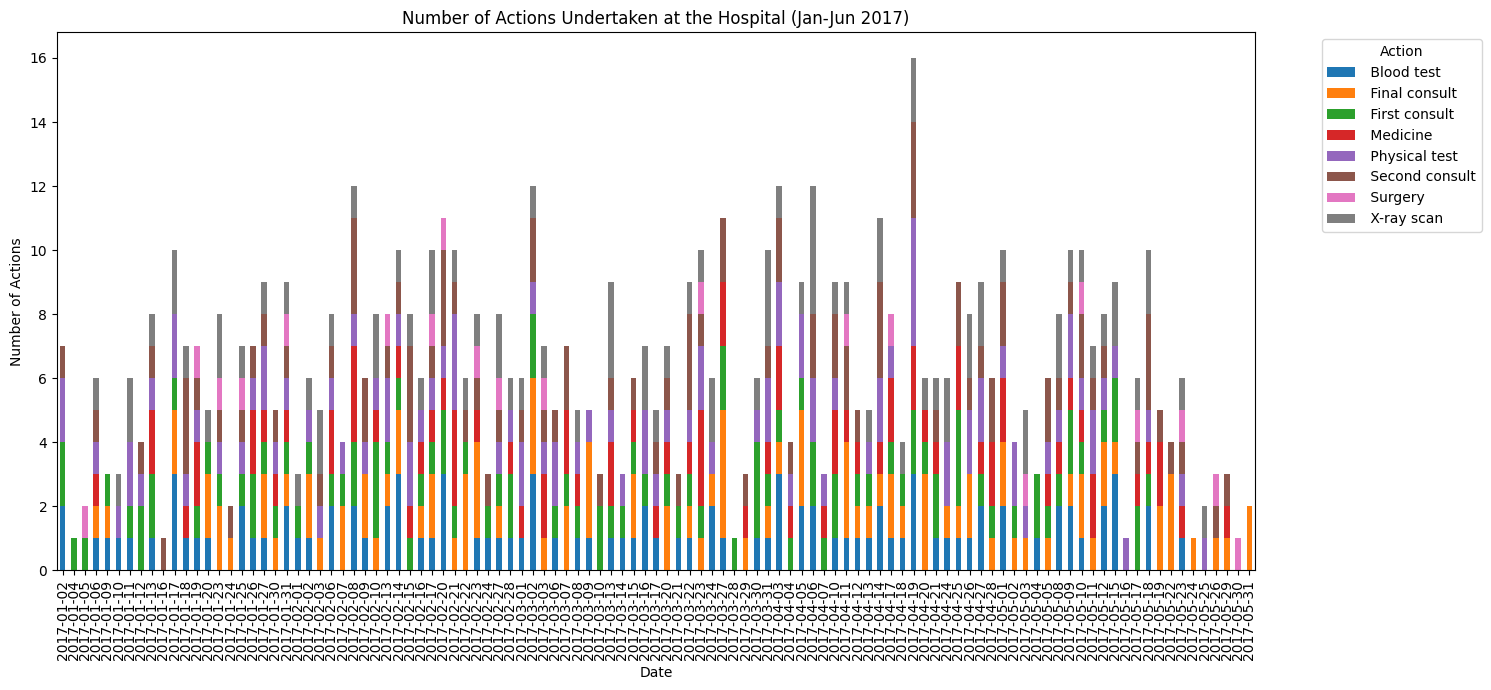

In [20]:
#Question 4. Generating visuals showing actions undertaken at the hospital
import matplotlib.dates as mdates

#filter data between January 2017 and June 2017
start_date = "2017-01-01"
end_date = "2017-06-30" 
filtered_data = log2_csv[(log2_csv["time:timestamp"] >= start_date) & (log2_csv["time:timestamp"] <= end_date)]

#Group by date and action, then count the number of actions per day
action_counts = filtered_data.groupby([filtered_data["time:timestamp"].dt.date, "concept:name"]).size().unstack().fillna(0)

#plot the data
fig, ax = plt.subplots(figsize=(15, 7))
action_counts.plot(kind="bar", stacked=True, ax=ax)

#set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Number of Actions")
ax.set_title("Number of Actions Undertaken at the Hospital (Jan-Jun 2017)") 
ax.legend(title="Action", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


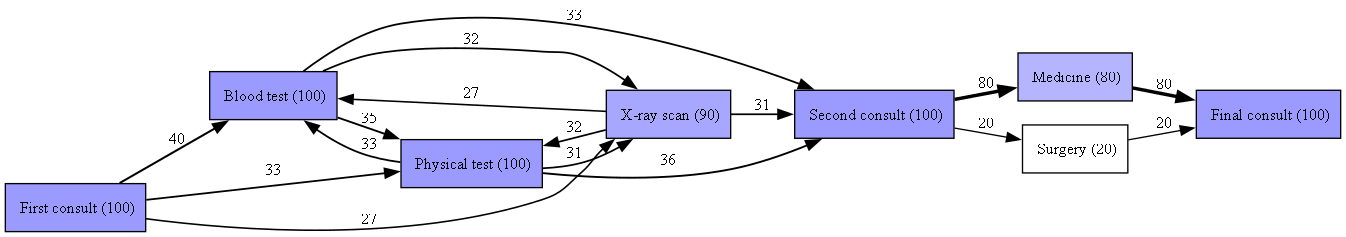

In [ ]:
#Question 5. Visualizing the most common actions undertaken by each department
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.dfg import visualizer as dfg_visualizer

#convert  data to event log#
event_log = log_converter.apply(log2_csv, variant=log_converter.Variants.TO_EVENT_LOG)

#discover the direct-follows graph
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
activities_count = pm4py.get_event_attribute_values(event_log, "concept:name")

#visualize DFG graph With frequencies
gviz = dfg_visualizer.apply(
    dfg, 
    log=event_log, 
    variant=dfg_visualizer.Variants.FREQUENCY, #use enum instead of string
    parameters={
        "activities_count": activities_count,
        "format": "png"
    }
)

dfg_visualizer.view(gviz)#display the graph



From the above, the process is seen as follows

1. First consult → Leads to medical tests (Blood test, Physical test, X-ray scan).

2. After tests → Patients return for a Second consult.

3. Treatment phase:

    i) Most get Medicine (80 cases).

    ii) Some need Surgery (20 cases).

4. Final consult → The process ends.